- 학습을 통해서 하이퍼 파라미터를 찾은 후 딥러닝에서는 **전체 데이터로 재학습**

### 학습 과정
1. Raw Data
2. Pre-Processing(필수)
3. holdout
4. Pre-processing(성능향상)
4. training
5. hyperparameter Optimization
6. final model evaluation
    - 전체 데이터 합쳐서 재학습
    
    
## CNN
-  텐서플로우 공식문서 합성곱 신경망 참고: https://www.tensorflow.org/tutorials/images/cnn?hl=ko
- 최적의 covolution filter를 학습을 통해서 찾음
- 컨볼루션
    - feature map: feaure extraction 으로 잘 분류할 수 있도록 이미지를 변환
    -  2차원 공간적 개념 유지
    - translational invariance

- pooling layer
    - 요즘 경향은 pooling 대신에 stride
    - 값을 줄임
        - Global Average pooling - Flatten 대신 사용하기도 함
    -  유연성
- Keras.js mnist CNN 시각화 참고: https://transcranial.github.io/keras-js/#/mnist-cnn


### holdout
- model selection : 모델 비교해서 선택
- 가정 : iid( independent & identically distributed)  


### 성능 향상을 위한 전처리
- normalization 정규화: 특성 유지하면서 수렴속도가 빨라짐
    - batch, weight ,group , layer, instance normalization

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


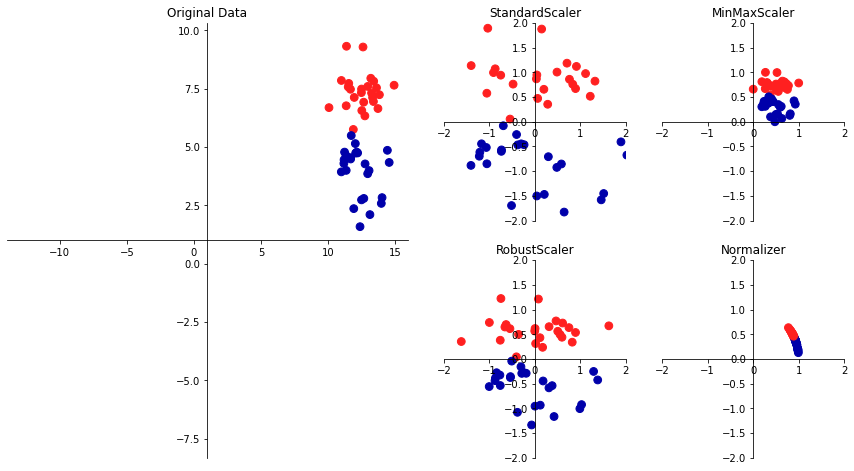

In [1]:
import mglearn
mglearn.plot_scaling.plot_scaling()

## CNN History 

1.  Imagenet Classification with Deep Convolutional Neural Networks
    - AlexNet
2. Visualizing and Understanding Convolutional Networks
    - ZFnet
3. Very Deep Convolutional Networks For Large-Scale Image Recognition
    - VGG
4. Going Deeper with Convolutions
    - GoogLeNet

#### overfitting: 학습된 데이터에서만 성능이 좋음
    - data augmentation : 좌우반전
    - scaling
    - regularizer ( L1,L2)
    - Early Stopping
    - Dropout: 랜덤하게 노드 제거 (ensemble 여러개의 모델을 하나로 합침)


#### Learning Curve
- 데이터에 따라 training , test score 비교하여 학습되는 정도 확인

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

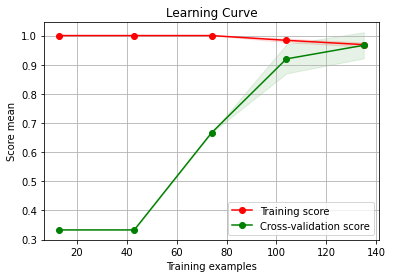

In [2]:
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn_evaluation import plot #learning curve그리기
iris= sns.load_dataset('iris')

a,b,c=learning_curve(KNeighborsClassifier(),iris.iloc[:,:-1],iris.species, cv=10)
plot.learning_curve(b,c,a)

2017년 부터는 실무적 테크닉
- 연산 줄이기

- 정확도
- 속도 
    - 레이어 적음
    
### 이미지 분류
참고 :https://www.tensorflow.org/tutorials/images/classification
#### 기계학습 워크플로우
1. 데이터 검토 및 이해
    - EDA (특히 정형데이터)
    - image: OpenCV, PIL
    - 관리 구조: 모델 연동 방식이 달라짐
        - DB
        - directory
            - 각 클래스별로 폴더 생성
        - Pandas 테이블로 관리
        - tf.data.Dataset, numpy, hdf5
    
2. 입력 파이프라인 구축
3. 모델 구축
4. 훈련
5. 테스트
6. 개선

**resize** 
- 전처리를 탐색을 통해 전략을 수립
  - PIL, Numpy ,Tensor
    - keras.preprocessing
    - 디스크의 이미지 디렉토리에서 tf.data.Dataset으로 바꾸어줌
    - 간단한 전처리
    - holdout
    
---


### tf.data pipeline 구축

-  AUTOTUNE 기능을 제공해서 효율적으로 오버헤드 처리
- CPU,GPU 자원을 자동으로 튜닝
- 병렬화
- 속도 향상
- `tf.data.experimental.AUTOTUNE`
  > -  scikit njobs= -1
- prefetch
- 한 번 학습한 데이터르 캐쉬 (메모리 사용)

**from_logits**
- numerically stable 수치적으로 안정성 제공
- softmax를 안쓰는 테크닉 

> - 4.8 Numerical Stability and Initialization, Dive into Deep learning
- Duck-typing

- loss argument 3가지
  - string : 디폴트로 사용
  - class :옵션 기본값 변경
  - function : functional paradigm
    - 없는경우도 존재
    
    
#### underfitting
- traing accuracy > 80%
- test accuracy < 70%


1. data augmentation


---

- tf.keras.losses.SparseCategoricalCrossentropy() : 객체
- tf.keras.losses.sparse_categorical_crossentropy : function
- 'sparse_categorical_crossentropy' : string

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [5]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [6]:
#데이터 표준화 RGB채널 0~1사이값으로 표준
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
#함수형 패러다임 map (파이썬에서 기억나시죠?)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# iter 로 데이터 하나씩 봄 (Lazy Evaluation)
image_batch, labels_batch = next(iter(normalized_ds))

first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [7]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  # VGG kernel size 3
  layers.Conv2D(16, 3 , padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) #softmax 사용하지 않고 from_logits
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 47s 507ms/step - loss: 1.2549 - accuracy: 0.4567 - val_loss: 1.0948 - val_accuracy: 0.5926
Epoch 2/10
92/92 [==============================] - 41s 440ms/step - loss: 0.9763 - accuracy: 0.6182 - val_loss: 1.0134 - val_accuracy: 0.6008
Epoch 3/10
92/92 [==============================] - 41s 442ms/step - loss: 0.7782 - accuracy: 0.7098 - val_loss: 1.0074 - val_accuracy: 0.6049
Epoch 4/10
92/92 [==============================] - 43s 468ms/step - loss: 0.5647 - accuracy: 0.7984 - val_loss: 0.9276 - val_accuracy: 0.6526
Epoch 5/10
92/92 [==============================] - 44s 482ms/step - loss: 0.3568 - accuracy: 0.8774 - val_loss: 1.0638 - val_accuracy: 0.6608
Epoch 6/10
92/92 [==============================] - 40s 435ms/step - loss: 0.2243 - accuracy: 0.9278 - val_loss: 1.2509 - val_accuracy: 0.6444
Epoch 7/10
92/92 [==============================] - 38s 418ms/step - loss: 0.1214 - accuracy: 0.9632 - val_loss: 1.4042 - val_accuracy: 0.6376

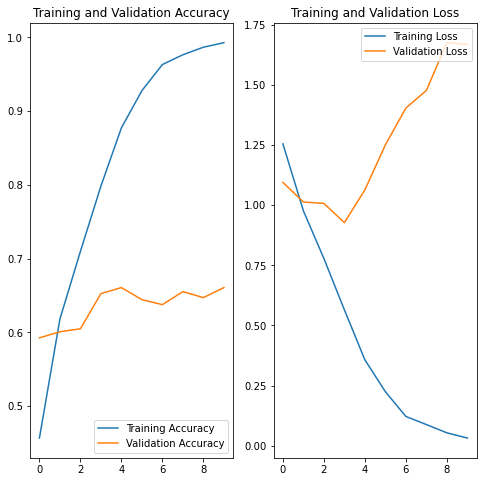

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**data augmentation**
- 내부적으로 PIL사용
- CPU만 지원

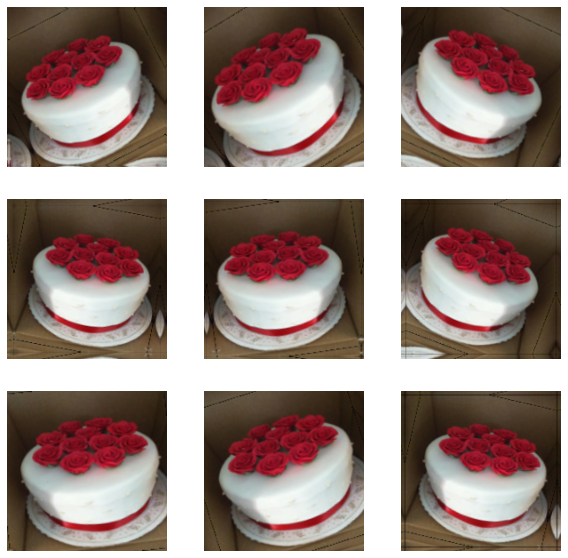

In [10]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [11]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [12]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 51s 557ms/step - loss: 1.3390 - accuracy: 0.4114 - val_loss: 1.1324 - val_accuracy: 0.5381
Epoch 2/15
92/92 [==============================] - 45s 487ms/step - loss: 1.0766 - accuracy: 0.5736 - val_loss: 1.0067 - val_accuracy: 0.5845
Epoch 3/15
92/92 [==============================] - 45s 491ms/step - loss: 0.9934 - accuracy: 0.6052 - val_loss: 1.0147 - val_accuracy: 0.5967
Epoch 4/15
92/92 [==============================] - 44s 479ms/step - loss: 0.9212 - accuracy: 0.6434 - val_loss: 0.9108 - val_accuracy: 0.6431
Epoch 5/15
92/92 [==============================] - 44s 475ms/step - loss: 0.8768 - accuracy: 0.6546 - val_loss: 0.8762 - val_accuracy: 0.6730
Epoch 6/15
92/92 [==============================] - 44s 479ms/step - loss: 0.8162 - accuracy: 0.6941 - val_loss: 0.8377 - val_accuracy: 0.6676
Epoch 7/15
92/92 [==============================] - 46s 500ms/step - loss: 0.7907 - accuracy: 0.6962 - val_loss: 1.0029 - val_accuracy: 0.6403

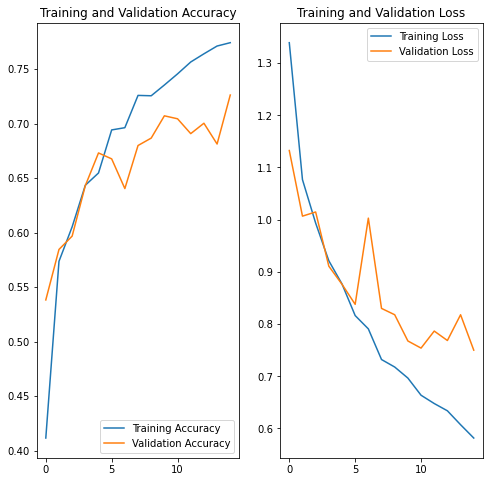

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Transfer Learning
- 기존에 학습한 모델을 가져와서 새로운 모델을 만듦
    - 기존의 학습된 모델의 가중치가 변함
    
> ### Incremental Learning
>    - 기존의 모델에 추가해서 학습
>    - eg. Knowledge Distillation 지식 증류

- 단순한 feature에서 점점더 구체적인 추상화된 feature 추출해서 영상에서는 잘 됨

- 데이터가 적고 유사한 경우 기존 모델의 Fully connected만 만 교체
    - include_top=False
    - trainalbe =False

>  ETRI 경량 딥러닝 기술 동향.pdf 참고
    - feasibility 테스트 이후 경량화
    - 단순화, 정확도 낮음
- 텐서플로 허브와 전이학습 참고: https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub?hl=kozz

### imbalanced dataset
- 과적합 발생 가능
- 층화계층법(stratified sampling)
- data shift : 학습, 검정 데이터 비율 상이
- 클래스 비율에 맞춰 나누어

### Data Augmentation

### ImageDataGenerator
- 데이터 생성, 정해진 타겟 사이즈 만큼 생성,
- 데이터가 많은 경우 하나식 메모리에 올려서 효율적 관리

generator
1. tuple comp
2. yield

zero-centered [-1,1]
- [0,1] 에서 항상 양수이면 zigzag현상 방지

데이터 구성
- flow_from_dataframe
- flow_from_directory

load_files
- 폴더명 기반을 분류
- EDA에 load_files불편

In [16]:
import tensorflow_datasets as tfds

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [17]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

IMAGE_SHAPE = (224, 224)

image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


### Tensorflow Hub
- https://www.tensorflow.org/hub
    - TensorFlow로 만들어진 모델, 데이터셋 제공
    - 사용 쉬움
    - https://tfhub.dev/s?subtype=module,placeholder

### headless model
- 분류기 없이 feature extractor만 존재  


**hub model**
- mobilenet_v2 
- image classification
- fine tunable            
- feature_vector


- feature extractor 부분은 재학습 하지 않음
- feature extractor가 성능이 좋아서 간단한 예측모델 추가

In [14]:
import tensorflow_hub as hub

feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" 


feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

In [18]:
feature_extractor_layer.trainable = False

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(image_data.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [19]:
layers=hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" )

len(layers.weights) # 260개 layer

#맨 끝의 레이어는 1차원, Flatten 불필요

260

모델
- 레이어를 list형식으로 저장
- 각 레이어별 weight 있음

In [21]:
model=tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(64,3, input_shape=(20,20,1)),
     tf.keras.layers.Conv2D(64,3),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1)
 ])

In [22]:
model.layers[0].bias

<tf.Variable 'conv2d_6/bias:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [24]:
# model.layers[0].kernel

In [27]:
layers.weights[-2] 

<tf.Variable 'Variable:0' shape=(1280,) dtype=float32, numpy=
array([ 0.0001598 , -0.00104793, -0.00021349, ..., -0.00017816,
       -0.00038758,  0.00021439], dtype=float32)>

### TensorFlow 학습 방법
1. fit
    - 세부적으로 조절 불가
2. fit_generator
    - ImageDataGenerator 
3. train_on_batch
    - batch size만큼 학습
4. train
    - Estimator 
5. with tf.GradientTape
    - 어디에든 사용 가능

In [35]:
# model.compile(
#   optimizer=tf.keras.optimizers.Adam(),
#   loss='categorical_crossentropy',
#   metrics=['acc'])

# class CollectBatchStats(tf.keras.callbacks.Callback):
#     def __init__(self):
#         self.batch_losses = []
#         self.batch_acc = []

#     def on_train_batch_end(self, batch, logs=None):
#         self.batch_losses.append(logs['loss'])
#         self.batch_acc.append(logs['acc'])
#         self.model.reset_metrics()
    

# steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

# batch_stats_callback = CollectBatchStats()

# history = model.fit_generator(image_data, epochs=2,
#                               steps_per_epoch=steps_per_epoch,
#                               callbacks = [batch_stats_callback])

In [41]:
from sklearn.datasets import load_iris
import pandas as pd
data=load_iris()

iris=pd.DataFrame(data.data,columns=data.feature_names)
iris['target']=data.target
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,input_shape=(4,),activation='relu'),
     tf.keras.layers.Dense(16,'relu'),
     tf.keras.layers.Dense(3,'softmax')
])

model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

In [1248]:
model.train_on_batch(iris.iloc[:,:-1],iris.target)

[0.04980722814798355, 0.9800000190734863]